In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos


* Carga los datos **asegurándote de integrar los nombres de las variables** en el dataframe. Puedes preprocesar los datos con alguna herramienta externa y después cargarlos en la sesión de Colab. Si decides capturar los nombres de las variables a partir del archivo ```communities.names``` la información del siguiente sitio puede ser de utilidad: 


https://www.pythontutorial.net/python-basics/python-read-text-file/

> <font color="red">Al leer los datos, asegúrate de identificar correctamente los valores faltantes.</font>   

In [193]:
na_values = ["?"]
df =  pd.read_csv('communities.data', na_values = na_values)
df

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
2,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1989,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1990,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1991,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19



* Elimina las variables que no sean predictoras o la de respuesta (asegúrate de leer la descripción de los datos para identificarlas correctamente).

In [194]:
df = df.drop(columns = ["8", "?", "?.1", "Lakewoodcity", "1"])
df

,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
2,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
4,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1989,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1990,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1991,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [195]:
# df.columns = ["population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban", "pctUrban", "medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst",""]

## Datos faltantes.

* Identifica las variables que tengan más del 10% de datos faltantes y elimínalas. 
* Imprime la lista de dichas variables.

In [196]:
df.isnull().sum()

0.19         0
0.33         0
0.02         0
0.9          0
0.12         0
          ... 
0.9.1     1675
0.5.2     1675
0.32.2       0
0.14.3    1675
0.2.2        0
Length: 123, dtype: int64

* Identifica las variables con datos faltantes (menos del 10%) e imputa dichos valores usando la mediana de la variable.
* Imprime la lista de dichas variables. 

In [197]:
df.mean()

0.19      0.057526
0.33      0.463462
0.02      0.179709
0.9       0.753643
0.12      0.153698
            ...   
0.9.1     0.697956
0.5.2     0.440252
0.32.2    0.093939
0.14.3    0.195252
0.2.2     0.237998
Length: 123, dtype: float64

> <font color="red"> Verifica que no tengas datos faltantes en tu conjunto de datos.</font>

In [198]:
mean_value = df.mean()
df = df.fillna(value=mean_value)

# Exploración de datos

* Explora la distribución de los datos de cada variable usando boxplots [una sola gráfica que integre los boxplots de todas las variables, no importa que sean decenas de variables].  

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe370ec9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe370ece50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe370ec700>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbe37093430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe37093700>,
 'means': []}

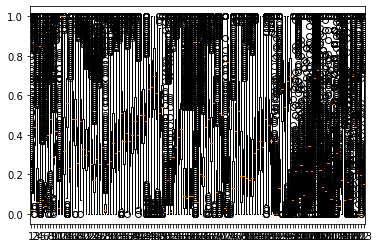

In [199]:
plt.boxplot(df)

# Separación de datos

* Separa conjuntos de entrenamiento y prueba en una proporción 80-20.

# PCA

En esta sección aplicarás la técnica de PCA para reducir la dimensionalidad del conjunto de datos.

* Proyecta los datos de entrenamiento empleando un total de componentes que preserven, por lo menos, el 70% de la varianza original. 

* Indica claramente cuántas componentes utilizarás.

# Modelado

* Construye varios modelos a partir de la técnica XGBoost (https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html). Explora las combinaciones que se obtienen con 25, 50, 100, 250 y 500 estimadores (árboles) y 3, 5, 7, 10 y 20 para la profundidad máxima (25 modelos en total). Para comparar los modelos, utiliza validación cruzada por k-dobleces para que no necesites un conjunto de validación (puedes emplear la función ```GridSearchCV```: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

> <font color="red"> Asegúrate de usar los datos de entrenamiento, transformados con PCA, para ajustar los modelos. 

> <font color="red"> Asegúrate de utilizar el coeficiente de determinación, $R^2$, como métrica para comparar modelos.

* Indica cuáles son los parámetros del mejor modelo identificado en la validación cruzada.


# Evaluación del modelo

* Evalúa el **error absoluto promedio** del mejor modelo encontrado en el punto anterior, sobre los datos de prueba. 

> <font color="red"> Asegúrate de que transformas los datos de prueba proyectándolos con PCA (sólo transfórmalos, no vuelvas a ajustar los parámetros de PCA).